# Principal Component Analysis (PCA)

| concept | description |
|---------|-------------|
| dimensionality reduction | replacing features by a smaller subset  |
| principal components | new features the data is transformed to |
| vanilla PCA | use if the data fits into memory |
| incremental PCA | PCA variant that works in batches (for lots of data or frequent updates) |
| randomized PCA | faster when reducing number of dimensions heavily |
| Kernel PCA | PCA variant for non-linear transformations |

## Background
**Principal Component Analysis (PCA)** is an **unsupervised learning** method used for **dimensionality reduction**.

For multivariate data sets, it often happens that a few measured variables already contain a large part of the information and other metrics contribute little. PCA is a procedure that allows to condense such data sets to the “most informative” dimensions.

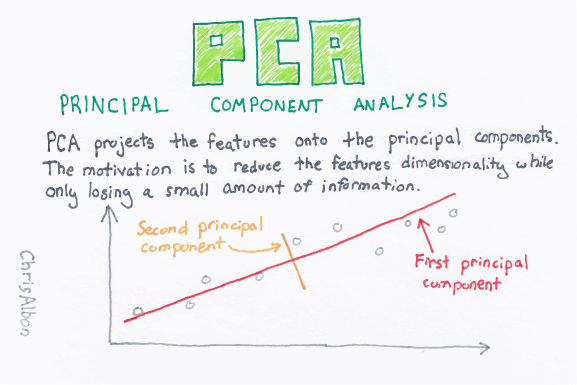

PCA transforms the feature space X into a new feature space T, the principal components W:

\begin{align}
T = X * W
\end{align}

## Principal Components
Each principal component is a linear combination of the original features that explains the **maximum variance** in the data.

The main difference to other dimensionality reduction methods is that the **principal components are ranked** – the **first principal component always explains the highest proportion of the variance**. The second principal component explains the next highest proportion and so on.

The **maximum number of principal components is the number of original features**. 
- In that case, no information is lost in the transformation.

With less principal components than original features, the new feature space is an approximation of the original space.

\begin{align}
T \approx X * W
\end{align}

**Note:** The components work similarly as in NMF – the more components you have, the better you represent the data. However, in NMF each component tends to explain an **equal** part of the variance.

---

## Algorithm
### Step 1: Calculate the covariance matrix
It is assumed that the variables that have the greatest variance also contain the most information.

To measure the redundancy in the data, we calculate the covriance of each measured variable with each other. This then results in the covariance matrix C:

\begin{align}
C_{ij}=\frac{1}{n-1}\sum^n_{k=1}\left(x_{ik}-\bar{x}_i\right)\left(x_{jk}-\bar{x}_j\right)
\end{align}

where i and j are the features and n the number of data points.

**Note:** The features may have very different value ranges. Before calculating the covariance it is not only advisable to de-mean the data but also scale it.

### Step 2: Calculate the eigenvectors
Calculate the eigenvectors of the matrix C and sort them according to their corresponding eigenvalues (largest first). The eigenvectors are the so-called principal components and the associated eigenvalues indicate how much variance (“information”) is included in this principal component is included.

The cumulative sum of the eigenvalues gives the percentage of variance that is explained by the first two principal components.

### Step 3: Transform the data
Project the original data set by multiplying it with the desired number of principal components:

\begin{align}
T=X⋅W
\end{align}

where X is the d-dimensional (normalized) data set and W is a matrix, containing the principal components in columns.

Applications
reduce calculation time
reduce overfitting
preprocessing step for other unsupervised methods (e.g. clustering or t-SNE)

### What is it, and what does it have to do with this week's project?
#### Let's start with some familiar code:

In [1]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
%matplotlib inline


(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

Using TensorFlow backend.


#### And let's write a function that takes in numpy arrays of images and renders/plots the first 40 of them:

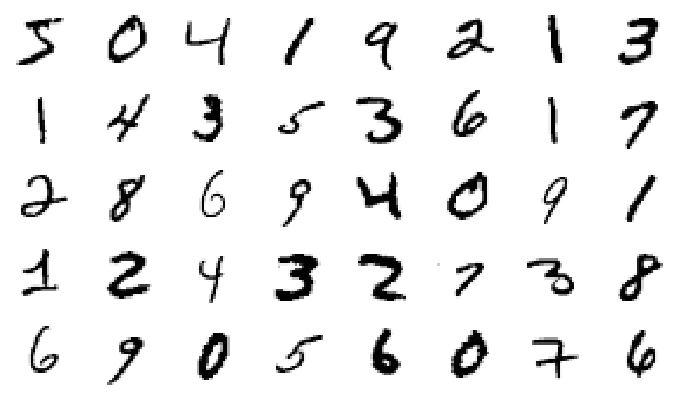

In [2]:
def draw_array(x):
    plt.figure(figsize=(12,7))
    for i in range(40):
        plt.subplot(5, 8, i+1)
        plt.imshow(x[i], cmap=plt.cm.Greys)
        plt.axis('off')

draw_array(xtrain)

---

### 1. Need to reshape the data so that it can be properly handled in sklearn

In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtrain = xtrain.reshape(-1, 28*28)

In [5]:
xtrain.shape

(60000, 784)

### Standard Scalar
- Some people recommend using standard scalar to 'demean' the data

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss = StandardScaler()
ss_xtrain = ss.fit_transform(xtrain)

In [8]:
ss_xtrain.shape

(60000, 784)

### 2. Split training data even further (to speed up the calculation)

In [9]:
xsmall = xtrain[:1000]
ysmall = ytrain[:1000]

In [10]:
xsmall.shape

(1000, 784)

### 3. Initialize PCA from Scikit-Learn and fit on X data
- By how many components would we like to decompose our data?

In [11]:
from sklearn.decomposition import PCA

In [12]:
m = PCA(n_components=40)

In [13]:
m.fit(xtrain)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

---

- Notice that each of the components gives us 784 coefficients:

In [14]:
m.components_.shape

(40, 784)

---

- And we can see the percentage of the overall variation in the data that each principal contributes.

In [15]:
m.explained_variance_ratio_

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001,
       0.0210919 , 0.02022991, 0.01715818, 0.01692111, 0.01578641,
       0.01482953, 0.01324561, 0.01276897, 0.01187263, 0.01152684,
       0.01066166, 0.01006713, 0.00953573, 0.00912543, 0.00883404,
       0.00839317, 0.00812579, 0.00786364, 0.00744733, 0.00690853,
       0.00658087, 0.00648136, 0.00602485, 0.00586286, 0.00569746,
       0.00543428, 0.00505236, 0.0048757 , 0.00480015, 0.00471926])

### 4. Use the trained PCA model to transform the data to a lower number of features.
- new data - with less features

In [16]:
#new data - with less features
xt = m.transform(xsmall)

In [17]:
xsmall.shape

(1000, 784)

In [18]:
xt.shape

(1000, 40)

---

### 5. Use the inverse_transform() method to expand our reduced data back into its original shape.

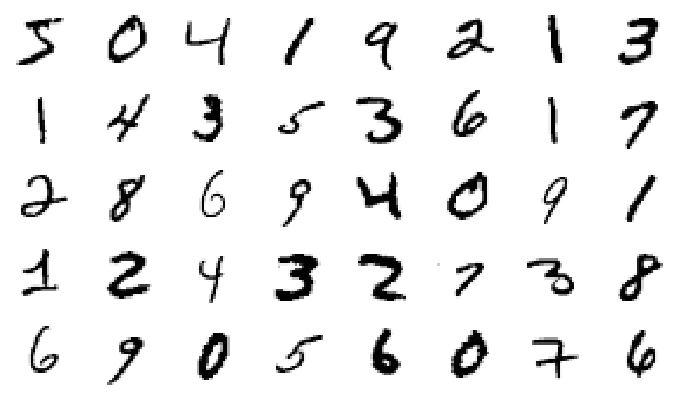

In [19]:
draw_array(xsmall.reshape(-1,28,28))

---

### 6. Visualize what our data looks after it has been reduced to N features.

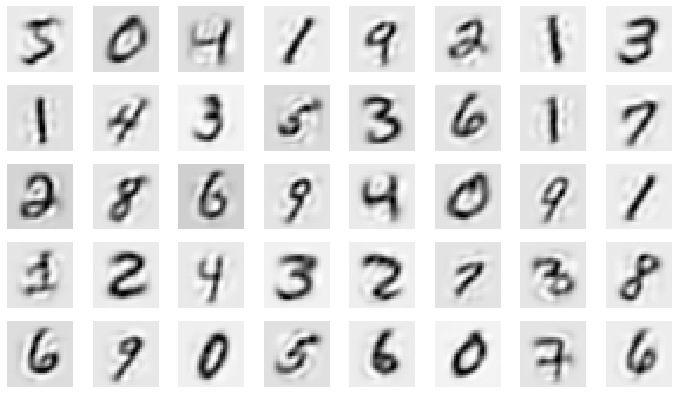

In [20]:
xback = m.inverse_transform(xt)
draw_array(xback.reshape(-1,28,28))

---

### 7. Can we actually see what the components look like, as well?

In [21]:
m.explained_variance_ratio_

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001,
       0.0210919 , 0.02022991, 0.01715818, 0.01692111, 0.01578641,
       0.01482953, 0.01324561, 0.01276897, 0.01187263, 0.01152684,
       0.01066166, 0.01006713, 0.00953573, 0.00912543, 0.00883404,
       0.00839317, 0.00812579, 0.00786364, 0.00744733, 0.00690853,
       0.00658087, 0.00648136, 0.00602485, 0.00586286, 0.00569746,
       0.00543428, 0.00505236, 0.0048757 , 0.00480015, 0.00471926])

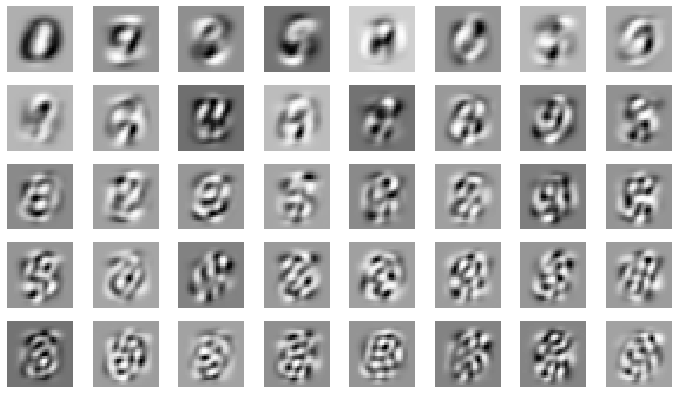

In [22]:
comp = m.components_.reshape(-1,28,28)
draw_array(comp)

In [23]:
msmall = PCA(n_components=1)
msmall.fit(xsmall)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
xs = msmall.transform(xsmall)
xs = msmall.inverse_transform(xs)

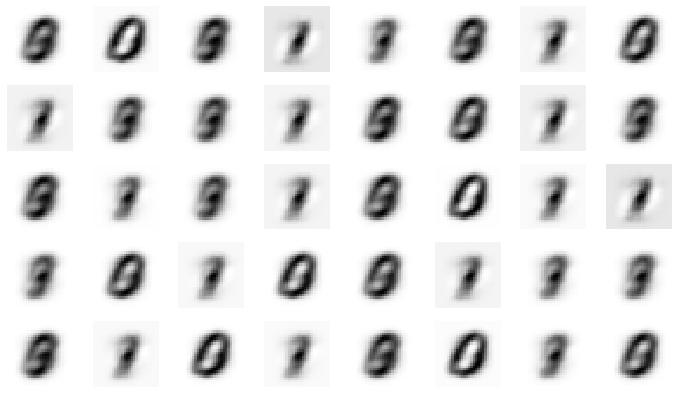

In [25]:
draw_array(xs.reshape(-1,28,28))

---

### 8. How can this be applied in practice (e.g. on this week's project)?
- Increase up the training speed of your models - save time
- Upsampling technique - use pca to create new data points

---

### 9. Other interesting analysis:
- Examine the false positives using a confusion matrix.

In [26]:
m

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
xt.shape

(1000, 40)

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=5, max_depth=3)
rf.fit(xt,ysmall)
print(rf.score(xt,ysmall))

0.656


In [29]:
xtest.shape

(10000, 28, 28)

In [30]:
xtest = m.transform(xtest.reshape(-1,784))

In [31]:
ypred = rf.predict(xtest)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
conf = confusion_matrix(ytest, ypred)
conf

array([[ 520,   61,   23,   69,    5,   11,  100,   48,  136,    7],
       [   1, 1042,   13,   36,    0,   17,    7,    3,   16,    0],
       [  25,   68,  560,  101,   42,   15,  105,   51,   59,    6],
       [  97,   36,   16,  635,    5,   73,   17,   64,   61,    6],
       [   1,   15,   26,   16,  601,   19,   42,  175,   27,   60],
       [  33,  100,   64,  108,   42,  199,   35,   94,  198,   19],
       [  10,   70,   48,   79,   27,   23,  615,   56,   13,   17],
       [  11,   68,    5,    8,   52,   21,    8,  693,   31,  131],
       [   5,   35,   32,   61,   12,   32,   20,   79,  649,   49],
       [   6,   26,    3,   11,  253,   25,   17,  295,   35,  338]])

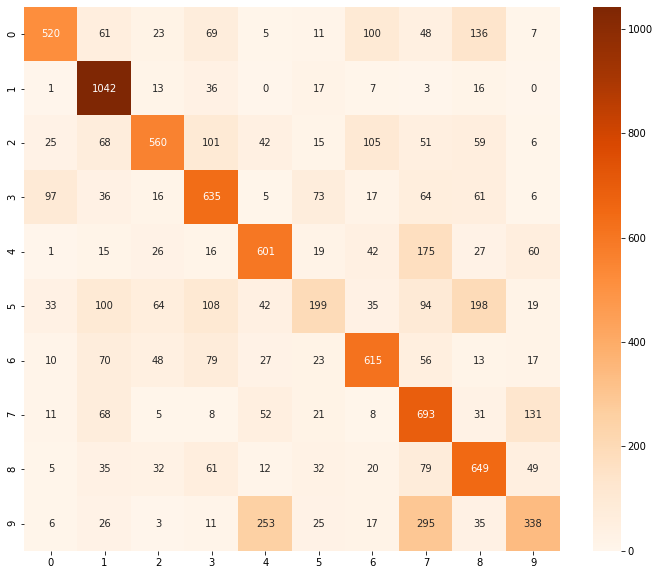

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,10))
sns.heatmap(conf, cmap='Oranges', annot=True, fmt='g')

---

### 10. Other interesting analysis:
- We can see how much of an impact adding more components has on capturing the overall variance of the original data set.
- We can do this by transforming the data with another PCA model that captures the maximum number of components (which in our case is 784) and plotting the cumulative sum of the explained variance ratio.

In [35]:
xtrain.shape

(60000, 784)

In [36]:
m784 = PCA(n_components=10)
x = m784.fit_transform(xtrain)

In [37]:
import numpy as np

In [38]:
ex_var = m784.explained_variance_ratio_
ex = range(784)
y = np.array(ex_var).cumsum()

ValueError: x and y must have same first dimension, but have shapes (784,) and (10,)

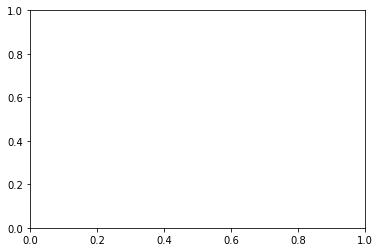

In [40]:
plt.plot(ex,y)